# Exploratory Data Analysis

# Data representation
1. **Corpus**: a collection of text
2. **Document-Term Matrix**: frequency matrix format

### Corpus

In [1]:
# Read in the document-term matrix
import pandas as pd

data_df = pd.read_csv("lyrics.csv",index_col=0)
data_df

,lyrics
ABBA,"[Verse 1] I, I've been in love before I though..."
David_Bowie,[Intro] [Verse 1] A small Jean Genie snuck of...
Janis_Joplin,"[Intro] Oh, come on, come on, come on, come on..."
Michael_Jackson,"[Verse 1] Your butt is mine, gonna tell you ri..."
Queen,[Verse 1] I can dim the lights and sing you so...
Rolling_Stones,[Intro] What a drag it is getting old [Verse ...
The_Clash,Stay around don't play around This old town an...
Bob_Dylan,[Verse 1] Go away from my window Leave at your...
Elton_John,[Verse 1] Can you hear it in the distance? Can...
Led_Zeppeling,[Intro] Hey That's right [Verse 1] Asked swee...


### Document-Term Matrix

In [2]:
# Read in the document-term matrix
import pandas as pd

data_clean = pd.read_csv("lyrics_clean.csv",index_col=0)
data_clean

,lyrics
ABBA,ive love thought would manage hit ceiling stil...
David_Bowie,small jean genie snuck city strung laser slash...
Janis_Joplin,oh come come come come didnt make feel like ma...
Michael_Jackson,butt mine gon na tell right show face broad da...
Queen,dim light sing song full sad thing tango two s...
Rolling_Stones,drag get old kid different today hear every mo...
The_Clash,stay around dont play around old town seem lik...
Bob_Dylan,go away window leave choose speed im one want ...
Elton_John,hear distance sense far away old rudolph reind...
Led_Zeppeling,hey thats right ask sweet mama let kid say mig...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ---------

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 2),min_df=2, max_df=.8)#,stop_words=['the','this'] )
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['document', 'first', 'first document', 'is the', 'the first', 'this is']
[[1 1 1 1 1 1]
 [2 0 0 1 0 0]
 [0 0 0 1 0 1]
 [1 1 1 0 1 0]]


In [5]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaah,aaaahaaah,aaah,aah,aahah,aaow,abandon,abe,abel,abide,...,zombie,zombies,zone,zoo,zoomin,zuma,zwei,élysées,über,überm
ABBA,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
David_Bowie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Janis_Joplin,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Michael_Jackson,3,0,0,1,2,8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Queen,0,0,0,7,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
Rolling_Stones,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,0,0,0,0
The_Clash,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,3,0,0,0,0,0
Bob_Dylan,0,0,0,0,0,0,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
Elton_John,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
Led_Zeppeling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_dtm[['love']]

,love
ABBA,35
David_Bowie,147
Janis_Joplin,47
Michael_Jackson,223
Queen,146
Rolling_Stones,35
The_Clash,22
Bob_Dylan,40
Elton_John,61
Led_Zeppeling,159


### TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data_clean.lyrics)
len(vectorizer.get_feature_names())

7070

In [8]:
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean.index
data_tfidf

,aaaah,aaaahaaah,aaah,aah,aahah,aaow,abandon,abe,abel,abide,...,zombie,zombies,zone,zoo,zoomin,zuma,zwei,élysées,über,überm
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012863,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006431,0.000000,0.000000
David_Bowie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Janis_Joplin,0.000000,0.000000,0.000000,0.006696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Michael_Jackson,0.008317,0.000000,0.000000,0.002036,0.006406,0.025624,0.002467,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003203,0.003203
Queen,0.000000,0.000000,0.000000,0.024450,0.000000,0.000000,0.004232,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.010991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rolling_Stones,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00606,0.000000,0.000000,0.000000,0.018179,0.000000,0.000000,0.000000,0.000000
The_Clash,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005672,0.00000,0.009818,0.000000,0.017015,0.000000,0.000000,0.000000,0.000000,0.000000
Bob_Dylan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004270,0.022177,0.005544,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Elton_John,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.015687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Led_Zeppeling,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
data_tfidf[['love']]

,love
ABBA,0.074662
David_Bowie,0.233851
Janis_Joplin,0.164233
Michael_Jackson,0.236912
Queen,0.266119
Rolling_Stones,0.070347
The_Clash,0.041386
Bob_Dylan,0.073559
Elton_John,0.122235
Led_Zeppeling,0.255639


## Most Common Words

In [10]:
#import sys
#!conda install --yes --prefix {sys.prefix} wordcloud

In [11]:
# Find the top 30 words 

data=data_dtm.transpose()

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ABBA': [('na', 132),
  ('know', 105),
  ('im', 98),
  ('like', 65),
  ('night', 65),
  ('think', 63),
  ('make', 55),
  ('time', 51),
  ('kiss', 48),
  ('feel', 44),
  ('dont', 44),
  ('ahha', 43),
  ('youre', 40),
  ('say', 38),
  ('life', 36),
  ('day', 35),
  ('hug', 35),
  ('love', 35),
  ('way', 34),
  ('oh', 32),
  ('gim', 30),
  ('doodoo', 28),
  ('ring', 28),
  ('wan', 28),
  ('wasnt', 27),
  ('come', 27),
  ('look', 27),
  ('dance', 26),
  ('man', 26),
  ('thats', 25)],
 'David_Bowie': [('im', 153),
  ('love', 147),
  ('oh', 88),
  ('la', 88),
  ('come', 85),
  ('li', 82),
  ('let', 70),
  ('know', 66),
  ('long', 59),
  ('man', 58),
  ('fame', 57),
  ('american', 55),
  ('year', 52),
  ('dont', 52),
  ('like', 51),
  ('time', 51),
  ('whop', 51),
  ('say', 49),
  ('young', 46),
  ('girl', 45),
  ('day', 44),
  ('want', 44),
  ('face', 42),
  ('thing', 41),
  ('modern', 40),
  ('afraid', 40),
  ('eye', 39),
  ('youre', 39),
  ('aint', 39),
  ('make', 38)],
 'Janis_Joplin': [

In [12]:
# Print the top 30 words said by each artist
for artist, top_words in top_dict.items():
    print(artist)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

ABBA
na, know, im, like, night, think, make, time, kiss, feel, dont, ahha, youre, say, life, day, hug, love, way, oh, gim, doodoo, ring, wan, wasnt, come, look, dance, man, thats
---
David_Bowie
im, love, oh, la, come, li, let, know, long, man, fame, american, year, dont, like, time, whop, say, young, girl, day, want, face, thing, modern, afraid, eye, youre, aint, make
---
Janis_Joplin
oh, yeah, know, good, la, honey, dont, baby, love, try, want, say, come, lord, babe, hey, little, whoa, man, make, im, da, youre, feel, like, time, youve, heart, bobby, tell
---
Michael_Jackson
love, dont, want, yeah, girl, know, youre, say, baby, im, really, stop, make, feel, aint, time, na, hold, cause, come, world, think, right, tell, oh, beat, bad, life, way, like
---
Queen
love, la, im, yeah, ooh, oh, want, dont, know, time, day, youre, come, somebody, na, make, say, life, ah, live, friend, bicycle, little, hey, man, like, ill, good, long, let
---
Rolling_Stones
baby, im, yeah, come, dont, oh, hey, 

In [13]:
# Look at the most common top words 
from collections import Counter

# Let's first pull out the top 30 words for each artist
words = []
for artist in data.columns:
    top = [word for (word, count) in top_dict[artist]]
    for t in top:
        words.append(t)

In [14]:
Counter(words).most_common()

[('know', 14),
 ('dont', 14),
 ('im', 13),
 ('like', 13),
 ('time', 13),
 ('love', 12),
 ('oh', 12),
 ('come', 12),
 ('make', 11),
 ('say', 11),
 ('want', 11),
 ('na', 10),
 ('youre', 10),
 ('yeah', 9),
 ('man', 8),
 ('way', 7),
 ('let', 7),
 ('think', 6),
 ('day', 6),
 ('good', 6),
 ('baby', 6),
 ('hey', 6),
 ('tell', 6),
 ('feel', 5),
 ('life', 5),
 ('girl', 5),
 ('little', 5),
 ('gon', 5),
 ('night', 4),
 ('look', 4),
 ('la', 4),
 ('long', 4),
 ('ill', 4),
 ('wan', 3),
 ('eye', 3),
 ('aint', 3),
 ('heart', 3),
 ('stop', 3),
 ('ooh', 3),
 ('ah', 3),
 ('away', 3),
 ('need', 3),
 ('home', 3),
 ('leave', 3),
 ('dance', 2),
 ('young', 2),
 ('try', 2),
 ('babe', 2),
 ('really', 2),
 ('world', 2),
 ('right', 2),
 ('hear', 2),
 ('rock', 2),
 ('ya', 2),
 ('blue', 2),
 ('tonight', 2),
 ('light', 2),
 ('ive', 2),
 ('run', 2),
 ('wait', 2),
 ('sun', 2),
 ('kiss', 1),
 ('ahha', 1),
 ('hug', 1),
 ('gim', 1),
 ('doodoo', 1),
 ('ring', 1),
 ('wasnt', 1),
 ('thats', 1),
 ('li', 1),
 ('fame', 1),
 ('

In [15]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 8]
add_stop_words

['know',
 'dont',
 'im',
 'like',
 'time',
 'love',
 'oh',
 'come',
 'make',
 'say',
 'want',
 'na',
 'youre',
 'yeah']

In [16]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

stop_words

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.lyrics)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


In [17]:
stop_words2=[]
for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['la','li','ooh','bird','number'])

In [19]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud

import sys
!conda install --yes --prefix {sys.prefix} wordcloud

from wordcloud import WordCloud

wc = WordCloud(collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

Solving environment: done

## Package Plan ##

  environment location: /home/mausoto/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.8.1            |   py37h4abf009_1         182 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         182 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.8.1-py37h4abf009_1



wordcloud-1.8.1      | 182 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


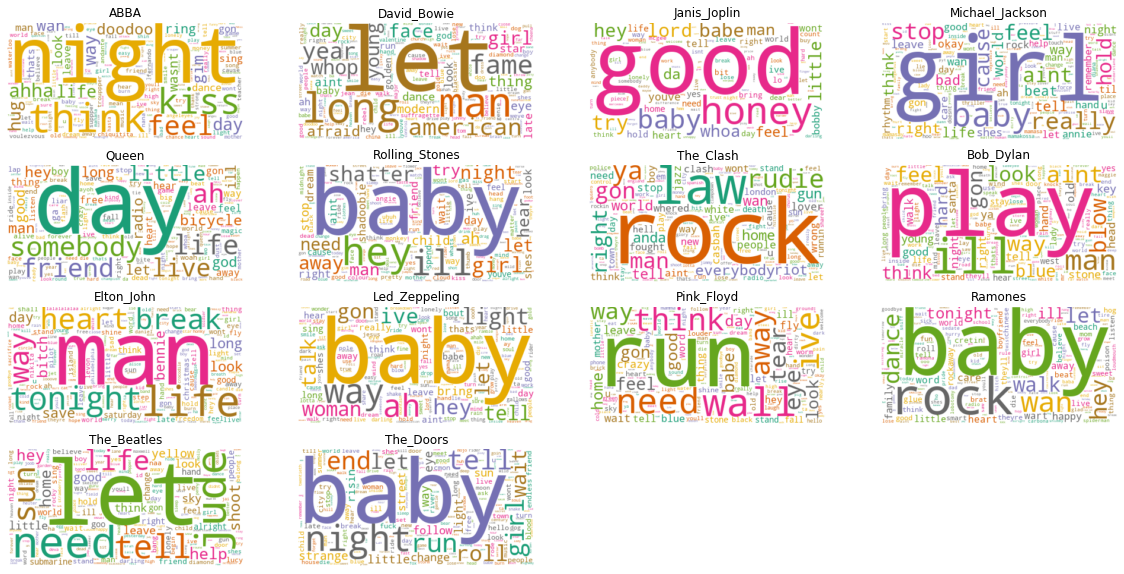

In [20]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]


# Create subplots for each comedian
for index, artist in enumerate(data.columns):
    wc.generate(data_clean.lyrics[artist])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.columns[index])
    
plt.show()


## Number of Words

In [21]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for artist in data.columns:
    uniques = data[artist].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['artist', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,artist,unique_words
2,Janis_Joplin,387
11,Ramones,655
0,ABBA,944
13,The_Doors,1017
9,Led_Zeppeling,1072
12,The_Beatles,1126
5,Rolling_Stones,1139
8,Elton_John,1191
10,Pink_Floyd,1231
3,Michael_Jackson,1266
